In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/550_datasets

/content/drive/MyDrive/550_datasets


# File names
- name.basics.tsv
- title.akas.tsv 
- title.basics.tsv 
- title.crew.tsv 
- title.episode.tsv 
- title.principals.tsv 
- title.ratings.tsv 

In [ ]:
import pandas as pd
import os
path = "/content/drive/MyDrive/550_datasets/"

# name.basics.tsv

In [ ]:
name_basics_df = pd.read_csv(os.path.join(path, "name.basics.tsv"), sep='\t', header=0, low_memory=False, na_values = "\\N")

FileNotFoundError: ignored

In [ ]:
name_basics_df.head()

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm0000001,Fred Astaire,1899.0,1987.0,"soundtrack,actor,miscellaneous","tt0072308,tt0045537,tt0053137,tt0050419"
1,nm0000002,Lauren Bacall,1924.0,2014.0,"actress,soundtrack","tt0037382,tt0038355,tt0071877,tt0117057"
2,nm0000003,Brigitte Bardot,1934.0,NaN,"actress,soundtrack,music_department","tt0056404,tt0057345,tt0049189,tt0054452"
3,nm0000004,John Belushi,1949.0,1982.0,"actor,soundtrack,writer","tt0077975,tt0078723,tt0072562,tt0080455"
4,nm0000005,Ingmar Bergman,1918.0,2007.0,"writer,director,actor","tt0060827,tt0083922,tt0050986,tt0050976"


### Datasize Measurement

In [ ]:
name_basics_df.dtypes

nconst                object
primaryName           object
birthYear            float64
deathYear            float64
primaryProfession     object
knownForTitles        object
dtype: object

In [ ]:
nconst (string) - alphanumeric unique identifier of the name/person
primaryName (string)– name by which the person is most often credited
birthYear – in YYYY format
deathYear – in YYYY format if applicable, else '\N'
primaryProfession (array of strings)– the top-3 professions of the person
knownForTitles (array of tconsts)

In [ ]:
import datetime
from datetime import date
convert_dict = {'nconst': str,
                'primaryName': str,
                # 'birthYear': date,
                # 'deathYear': date,
                }
 
name_basics_df = name_basics_df.astype(convert_dict)

In [ ]:
name_basics_df.shape

(12342313, 6)

In [ ]:
usage_by_col = name_basics_df.memory_usage(deep=True) # returns memory usage for each column
total_usage = usage_by_col.sum()
mbs = total_usage / 1e6 # convert to megabytes 
mbs

3518.550481

## Missing Value Detection

In [ ]:
name_basics_df.isnull().any()

nconst               False
primaryName           True
birthYear             True
deathYear             True
primaryProfession     True
knownForTitles        True
dtype: bool

## Miscentered Value Detection

In [ ]:
name_basics_df.max()

/var/folders/37/yy9msrnd0nx3kh3jmwq6yfc00000gn/T/ipykernel_49288/3712837012.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  name_basics_df.max()


nconst       nm9993719
birthYear       2022.0
deathYear       2023.0
dtype: object

In [ ]:
name_basics_df.min()

/var/folders/37/yy9msrnd0nx3kh3jmwq6yfc00000gn/T/ipykernel_49288/2102717740.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  name_basics_df.min()


nconst       nm0000001
birthYear          4.0
deathYear         17.0
dtype: object

In [ ]:
name_basics_df.describe()

,birthYear,deathYear
count,571871.000000,212058.000000
mean,1952.318568,1991.931255
std,34.879026,34.664586
min,4.000000,17.000000
25%,1931.000000,1978.000000
50%,1959.000000,2000.000000
75%,1978.000000,2013.000000
max,2022.000000,2023.000000


# title.akas.tsv

In [ ]:
title_df = pd.read_csv(os.path.join(path, "title.akas.tsv"), sep='\t', header=0, low_memory=False, na_values = "\\N")

In [ ]:
title_df.head(10)

,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
0,tt0000001,1,Карменсіта,UA,NaN,imdbDisplay,NaN,0.0
1,tt0000001,2,Carmencita,DE,NaN,NaN,literal title,0.0
2,tt0000001,3,Carmencita - spanyol tánc,HU,NaN,imdbDisplay,NaN,0.0
3,tt0000001,4,Καρμενσίτα,GR,NaN,imdbDisplay,NaN,0.0
4,tt0000001,5,Карменсита,RU,NaN,imdbDisplay,NaN,0.0
5,tt0000001,6,Carmencita,US,NaN,imdbDisplay,NaN,0.0
6,tt0000001,7,Carmencita,NaN,NaN,original,NaN,1.0
7,tt0000001,8,カルメンチータ,JP,ja,imdbDisplay,NaN,0.0
8,tt0000002,1,Le clown et ses chiens,NaN,NaN,original,NaN,1.0
9,tt0000002,2,Le clown et ses chiens,FR,NaN,imdbDisplay,NaN,0.0


In [ ]:
title_df['language'].value_counts()


ja     4062457
fr     4027600
hi     4001032
es     3971370
de     3970803
        ...   
roa          1
rn           1
eka          1
sq           1
cr           1
Name: language, Length: 107, dtype: int64

In [ ]:
title_df.dtypes

titleId             object
ordering             int64
title               object
region              object
language            object
types               object
attributes          object
isOriginalTitle    float64
dtype: object

In [ ]:
title_df.shape

(35104162, 8)

In [ ]:
title_df.isnull().any()

titleId            False
ordering           False
title               True
region              True
language            True
types               True
attributes          True
isOriginalTitle     True
dtype: bool

In [ ]:
usage_by_col = title_df.memory_usage(deep=True) # returns memory usage for each column
total_usage = usage_by_col.sum()
mbs = total_usage / 1e6 # convert to megabytes 
mbs

12403.777951

In [ ]:
title_df.describe()

,ordering,isOriginalTitle
count,3.510416e+07,3.510205e+07
mean,4.132854e+00,5.145266e-02
std,3.896093e+00,2.209192e-01
min,1.000000e+00,0.000000e+00
25%,2.000000e+00,0.000000e+00
50%,4.000000e+00,0.000000e+00
75%,6.000000e+00,0.000000e+00
max,2.480000e+02,1.000000e+00


In [ ]:
title_df['ordering'].describe()

count    3.510416e+07
mean     4.132854e+00
std      3.896093e+00
min      1.000000e+00
25%      2.000000e+00
50%      4.000000e+00
75%      6.000000e+00
max      2.480000e+02
Name: ordering, dtype: float64

<AxesSubplot: ylabel='Frequency'>

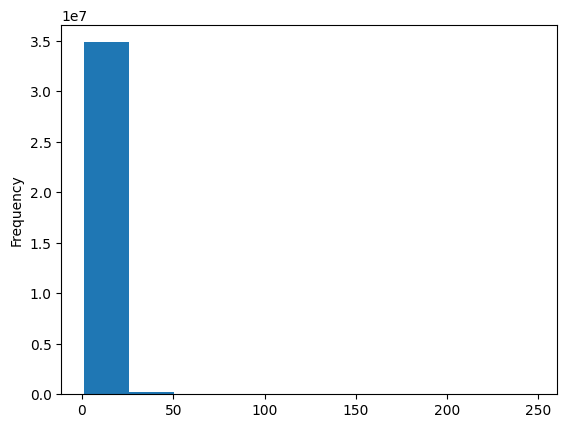

In [ ]:
title_df['ordering'].plot(kind='hist')

<AxesSubplot: >

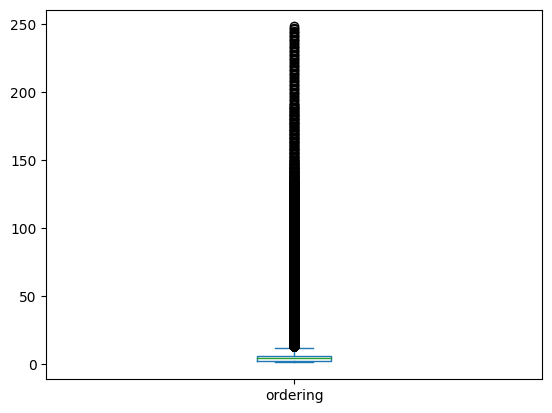

In [ ]:
title_df['ordering'].plot(kind='box')

In [ ]:
title_df['ordering'].max()

248

since we have a row with ordering that is extremely high

In [ ]:
title_df['ordering'].min()

1

# title.basics.tsv

In [ ]:
title_basic_df = pd.read_csv(os.path.join(path, "title.basics.tsv"), sep='\t', header=0, low_memory=False, na_values = "\\N")

In [ ]:
title_basic_df.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0.0,1894.0,NaN,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0.0,1892.0,NaN,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0.0,1892.0,NaN,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0.0,1892.0,NaN,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0.0,1893.0,NaN,1,"Comedy,Short"


In [ ]:
title_basic_df.dtypes

tconst             object
titleType          object
primaryTitle       object
originalTitle      object
isAdult           float64
startYear         float64
endYear           float64
runtimeMinutes     object
genres             object
dtype: object

In [ ]:
title_basic_df.to_csv('title_basic.csv', index=False)

In [ ]:
!pwd

/content


In [ ]:
pd.read_csv('title_basic.csv')

<ipython-input-12-4fd4669665ef>:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  pd.read_csv('title_basic.csv')


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0.0,1894.0,NaN,1.0,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0.0,1892.0,NaN,5.0,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0.0,1892.0,NaN,4.0,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0.0,1892.0,NaN,12.0,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0.0,1893.0,NaN,1.0,"Comedy,Short"
...,...,...,...,...,...,...,...,...,...
9658786,tt9916848,tvEpisode,Episode #3.17,Episode #3.17,0.0,2010.0,NaN,NaN,"Action,Drama,Family"
9658787,tt9916850,tvEpisode,Episode #3.19,Episode #3.19,0.0,2010.0,NaN,NaN,"Action,Drama,Family"
9658788,tt9916852,tvEpisode,Episode #3.20,Episode #3.20,0.0,2010.0,NaN,NaN,"Action,Drama,Family"
9658789,tt9916856,short,The Wind,The Wind,0.0,2015.0,NaN,27,Short


In [ ]:
title_basic_df['genres'].value_counts()

Drama                          1096773
Comedy                          667545
Talk-Show                       591300
News                            472000
Documentary                     463518
                                ...   
News,Romance                         1
Adventure,Film-Noir,Mystery          1
Drama,Musical,Reality-TV             1
Adventure,Comedy,Film-Noir           1
Action,Adult,Mystery                 1
Name: genres, Length: 2341, dtype: int64

In [ ]:
title_basic_df.shape

(9658791, 9)

In [ ]:
usage_by_col = title_basic_df.memory_usage(deep=True) # returns memory usage for each column
total_usage = usage_by_col.sum()
mbs = total_usage / 1e6 # convert to megabytes 
mbs

4034.57123

In [ ]:
title_basic_df.describe()

,isAdult,startYear,endYear
count,9.658790e+06,8.351192e+06,103365.000000
mean,3.306315e-02,2.004987e+03,2005.627572
std,1.950581e+00,2.017477e+01,16.533650
min,0.000000e+00,1.874000e+03,1906.000000
25%,0.000000e+00,2.001000e+03,1998.000000
50%,0.000000e+00,2.012000e+03,2012.000000
75%,0.000000e+00,2.018000e+03,2018.000000
max,2.020000e+03,2.030000e+03,2030.000000


In [ ]:
title_basic_df.isnull().any()

tconst            False
titleType         False
primaryTitle       True
originalTitle      True
isAdult            True
startYear          True
endYear            True
runtimeMinutes     True
genres             True
dtype: bool

In [ ]:
title_basic_df.describe()

,isAdult,startYear,endYear
count,9.658790e+06,8.351192e+06,103365.000000
mean,3.306315e-02,2.004987e+03,2005.627572
std,1.950581e+00,2.017477e+01,16.533650
min,0.000000e+00,1.874000e+03,1906.000000
25%,0.000000e+00,2.001000e+03,1998.000000
50%,0.000000e+00,2.012000e+03,2012.000000
75%,0.000000e+00,2.018000e+03,2018.000000
max,2.020000e+03,2.030000e+03,2030.000000


# title.crew.tsv

In [ ]:
title_crew_df = pd.read_csv(os.path.join(path, "title.crew.tsv"), sep='\t', header=0, low_memory=False, na_values = "\\N")

In [ ]:
title_crew_df.head(20)

,tconst,directors,writers
0,tt0000001,nm0005690,NaN
1,tt0000002,nm0721526,NaN
2,tt0000003,nm0721526,NaN
3,tt0000004,nm0721526,NaN
4,tt0000005,nm0005690,NaN
5,tt0000006,nm0005690,NaN
6,tt0000007,"nm0005690,nm0374658",NaN
7,tt0000008,nm0005690,NaN
8,tt0000009,nm0085156,nm0085156
9,tt0000010,nm0525910,NaN


In [ ]:
title_crew_df.dtypes

tconst       object
directors    object
writers      object
dtype: object

In [ ]:
title_crew_df.shape

(9658791, 3)

In [ ]:
title_crew_df.describe()

,tconst,directors,writers
count,9658791,5545516,4986096
unique,9658791,861018,1246691
top,tt0000001,nm1203430,nm6352729
freq,1,11084,13263


In [ ]:
usage_by_col = title_crew_df.memory_usage(deep=True) # returns memory usage for each column
total_usage = usage_by_col.sum()
mbs = total_usage / 1e6 # convert to megabytes 
mbs

1703.203012

In [ ]:
title_episode_df = pd.read_csv(os.path.join(path, "title.episode.tsv"), sep='\t', header=0, low_memory=False, na_values = "\\N")

In [ ]:
title_episode_df.head()

,tconst,parentTconst,seasonNumber,episodeNumber
0,tt0041951,tt0041038,1,9
1,tt0042816,tt0989125,1,17
2,tt0042889,tt0989125,\N,\N
3,tt0043426,tt0040051,3,42
4,tt0043631,tt0989125,2,16


In [ ]:
title_episode_df.dtypes

tconst           object
parentTconst     object
seasonNumber     object
episodeNumber    object
dtype: object

In [ ]:
title_principals_df = pd.read_csv(os.path.join(path, "title.principals.tsv"), sep='\t', header=0, low_memory=False, na_values = "\\N")

In [ ]:
title_principals_df.head()

,tconst,ordering,nconst,category,job,characters
0,tt0000001,1,nm1588970,self,\N,"[""Self""]"
1,tt0000001,2,nm0005690,director,\N,\N
2,tt0000001,3,nm0374658,cinematographer,director of photography,\N
3,tt0000002,1,nm0721526,director,\N,\N
4,tt0000002,2,nm1335271,composer,\N,\N


In [ ]:
title_principals_df.dtypes

tconst        object
ordering       int64
nconst        object
category      object
job           object
characters    object
dtype: object

In [ ]:
title_ratings_df = pd.read_csv(os.path.join(path, "title.ratings.tsv"), sep='\t', header=0, low_memory=False, na_values = "\\N")

In [ ]:
title_ratings_df.head()

,tconst,averageRating,numVotes
0,tt0000001,5.7,1957
1,tt0000002,5.8,263
2,tt0000003,6.5,1790
3,tt0000004,5.6,179
4,tt0000005,6.2,2593


In [ ]:
title_ratings_df.dtypes

tconst            object
averageRating    float64
numVotes           int64
dtype: object

# title.episode.tsv

In [ ]:
title_episode_df.describe()

,seasonNumber,episodeNumber
count,5.806112e+06,5.806112e+06
mean,3.736366e+00,3.972839e+02
std,2.312068e+01,1.304495e+03
min,1.000000e+00,0.000000e+00
25%,1.000000e+00,7.000000e+00
50%,1.000000e+00,2.600000e+01
75%,3.000000e+00,1.460000e+02
max,2.021000e+03,9.133400e+04


In [ ]:
title_episode_df.isna().sum()

tconst                 0
parentTconst           0
seasonNumber     1515564
episodeNumber    1515564
dtype: int64

In [ ]:
title_episode_df.dtypes

tconst            object
parentTconst      object
seasonNumber     float64
episodeNumber    float64
dtype: object

In [ ]:
title_episode_df["seasonNumber"].value_counts()


1.0       3691357
2.0        565005
3.0        321953
4.0        217643
5.0        158667
           ...   
2000.0          2
1971.0          1
1973.0          1
947.0           1
1980.0          1
Name: seasonNumber, Length: 394, dtype: int64

In [ ]:
title_episode_df["episodeNumber"].value_counts()

\N       1515564
1         269694
2         243197
3         232072
4         217200
          ...   
15706          1
15705          1
15463          1
15704          1
18081          1
Name: episodeNumber, Length: 15743, dtype: int64

In [ ]:
title_episode_df.head()

,tconst,parentTconst,seasonNumber,episodeNumber
0,tt0041951,tt0041038,1,9
1,tt0042816,tt0989125,1,17
2,tt0042889,tt0989125,\N,\N
3,tt0043426,tt0040051,3,42
4,tt0043631,tt0989125,2,16


In [ ]:
usage_by_col = title_episode_df.memory_usage(deep = True)
total_usage = usage_by_col.sum()
mbs = total_usage/1e6
mbs

1088.500609

# title.principals.tsv

In [ ]:
title_principals_df.head()

,tconst,ordering,nconst,category,job,characters
0,tt0000001,1,nm1588970,self,NaN,"[""Self""]"
1,tt0000001,2,nm0005690,director,NaN,NaN
2,tt0000001,3,nm0374658,cinematographer,director of photography,NaN
3,tt0000002,1,nm0721526,director,NaN,NaN
4,tt0000002,2,nm1335271,composer,NaN,NaN


In [ ]:
title_principals_df.shape

(54911745, 6)

In [ ]:
title_principals_df["characters"].value_counts()

["Self"]                                        4037759
["Self - Host"]                                 1656863
["Self - Guest"]                                 292855
["Self - Presenter"]                             287589
["Self - Panelist"]                              230580
                                                 ...   
["Self - Swordfish Fisherman"]                        1
["Self - Racing Driver, Livigno"]                     1
["Self - Civil Engineer, Tweede Maasvlakte"]          1
["Self - Urban Designer, Floating Homes"]             1
["Judah Harris"]                                      1
Name: characters, Length: 2732724, dtype: int64

In [ ]:
usage_by_col = title_principals_df.memory_usage(deep = True)
total_usage = usage_by_col.sum()
mbs = total_usage/1e6
mbs

16146.519775

In [ ]:
title_principals_df.describe()

,ordering
count,5.491174e+07
mean,4.601885e+00
std,2.782479e+00
min,1.000000e+00
25%,2.000000e+00
50%,4.000000e+00
75%,7.000000e+00
max,1.000000e+01


# title.ratings.tsv

In [ ]:
title_ratings_df.shape

(1284907, 3)

In [ ]:
usage_by_col = title_ratings_df.memory_usage(deep = True)
total_usage = usage_by_col.sum()
mbs = total_usage/1e6
mbs

105.571327

In [ ]:
title_ratings_df.head()

,tconst,averageRating,numVotes
0,tt0000001,5.7,1956
1,tt0000002,5.8,263
2,tt0000003,6.5,1789
3,tt0000004,5.6,179
4,tt0000005,6.2,2592


In [ ]:
title_ratings_df.describe()

,averageRating,numVotes
count,1.284907e+06,1.284907e+06
mean,6.950078e+00,1.041281e+03
std,1.385656e+00,1.739068e+04
min,1.000000e+00,5.000000e+00
25%,6.200000e+00,1.100000e+01
50%,7.100000e+00,2.600000e+01
75%,7.900000e+00,1.010000e+02
max,1.000000e+01,2.708394e+06
